In [1]:
import pandas as pd
#%matplotlib notebook
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt


from bokeh.plotting import figure, output_file
from bokeh.charts import Bar, output_file, show
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  
from bokeh.layouts import gridplot,row,column

#from bokeh.io import hplot, output_file, show
from bokeh.plotting import figure

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from bokeh.io import output_notebook
plt.style.use('ggplot')
#output_notebook()
import plotlib as pltme

Loading BokehJS ...

In [2]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
directory = directory + '1-node/'

In [16]:
#pd.read_csv(directory+ '8-1-4-new-settings/spark-metrics-20171027-112554.csv')

## 8-1-8 - new settings

After the last report, a spark computational bottleneck was found. At this report a research was performed at the parameters that after the processing rate of the records. It is found that the number of kafka partitions play an important role at the consumer perfomance. This hypothesis is validated from the following experiments.
 * Experimental Configuration:
 For the following experiments we utilized Wrangler system. We produced messages from 8 concurent producers which ran simultaneously. Points of total size of 20GB are produced and messages of total size of 35GB are sent. 
     * Spark Window Size: 60 seconds
     * Kafka partitions: 384 ( 1 per spark executors)
     * 1 broker

In [12]:
throughput_811_1 = pltme.plot_producer('8-1-8-new-settings/producers/producer-1/stdout-20171026-225347.csv',1,1,txt='',showPlot=False)
throughin_811 = pltme.plot_throughput_per_mini_batch('8-1-8-new-settings/spark-metrics-20171026-225303.csv',1,showPlot=False)
processing_time_811 =  pltme.plot_scheduling_and_Total_Delay('8-1-8-new-settings/spark-metrics-20171026-225303.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_811 = pltme.rec_per_sec(processing_time_811,throughin_811)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-8-new-settings/spark-metrics-20171026-225303.csv',16*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-8-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-8-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_811 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 185 Records/sec 


(0, 22)

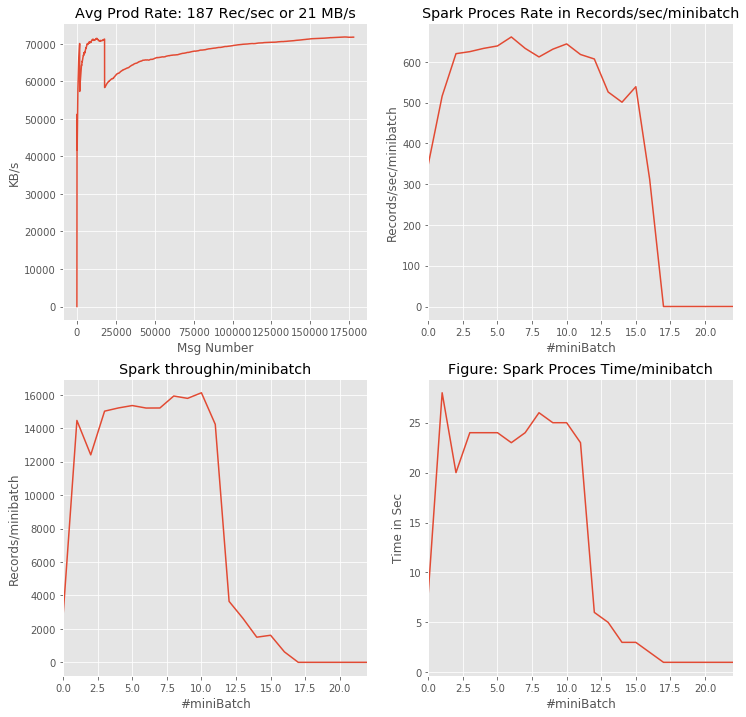

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False)
fig.set_size_inches(12,12)
#plt.subplot(221)
axes[0,0].plot(avg_production_rate_811[1],avg_production_rate_811[2])
axes[0,0].set_yscale('linear')
axes[0,0].set_title('Avg Prod Rate: ' + str(avg_production_rate_811[0]) + " Rec/sec or " + str(avg_production_rate_811[0]*5000*3*8/1024**2) + " MB/s")
axes[0,0].set_xlabel('Msg Number')
axes[0,0].set_ylabel('KB/s')

#plt.subplot(222)
axes[0,1].plot(processing_records_per_second_per_batch_811[0],processing_records_per_second_per_batch_811[1])
axes[0,1].set_title('Spark Proces Rate in Records/sec/minibatch')
axes[0,1].set_ylabel('Records/sec/minibatch')
axes[0,1].set_xlabel('#miniBatch')
axes[0,1].set_xlim([0, 22])


#plt.subplot(223)
axes[1,0].plot(throughin_811[0],throughin_811[1])
axes[1,0].set_title('Spark throughin/minibatch')
axes[1,0].set_ylabel('Records/minibatch')
axes[1,0].set_xlabel('#miniBatch')
axes[1,0].set_xlim([0, 22])


#plt.subplot(224)
axes[1,1].plot(processing_time_811[0],processing_time_811[1])
axes[1,1].set_title('Figure: Spark Proces Time/minibatch')
axes[1,1].set_xlabel('#miniBatch')
axes[1,1].set_ylabel('Time in Sec')
axes[1,1].set_xlim([0, 22])


#plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)


## 8-1-4 - new settings

In [22]:
throughput_814_1 = pltme.plot_producer('8-1-4-new-settings/producers/producer-1/stdout-20171027-112650.csv',1,1,txt='',showPlot=False)
throughin_814 = pltme.plot_throughput_per_mini_batch('8-1-4-new-settings/spark-metrics-20171027-112554.csv',1,showPlot=False)
processing_time_814 =  pltme.plot_scheduling_and_Total_Delay('8-1-4-new-settings/spark-metrics-20171027-112554.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_814 = pltme.rec_per_sec(processing_time_814,throughin_814)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-4-new-settings/spark-metrics-20171027-112554.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-4-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-4-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_814 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 174 Records/sec 


(0, 22)

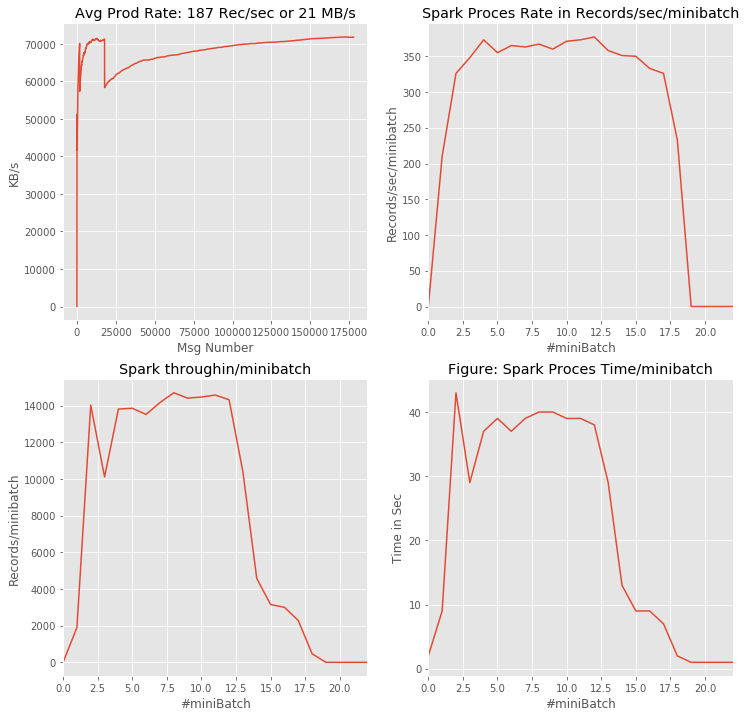

In [27]:
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False)
fig.set_size_inches(12,12)
#plt.subplot(221)
axes[0,0].plot(avg_production_rate_814[1],avg_production_rate_814[2])
axes[0,0].set_yscale('linear')
axes[0,0].set_title('Avg Prod Rate: ' + str(avg_production_rate_814[0]) + " Rec/sec or " + str(avg_production_rate_814[0]*5000*3*8/1024**2) + " MB/s")
axes[0,0].set_xlabel('Msg Number')
axes[0,0].set_ylabel('KB/s')

#plt.subplot(222)
axes[0,1].plot(processing_records_per_second_per_batch_814[0],processing_records_per_second_per_batch_814[1])
axes[0,1].set_title('Spark Proces Rate in Records/sec/minibatch')
axes[0,1].set_ylabel('Records/sec/minibatch')
axes[0,1].set_xlabel('#miniBatch')
axes[0,1].set_xlim([0, 22])


#plt.subplot(223)
axes[1,0].plot(throughin_814[0],throughin_814[1])
axes[1,0].set_title('Spark throughin/minibatch')
axes[1,0].set_ylabel('Records/minibatch')
axes[1,0].set_xlabel('#miniBatch')
axes[1,0].set_xlim([0, 22])


#plt.subplot(224)
axes[1,1].plot(processing_time_814[0],processing_time_814[1])
axes[1,1].set_title('Figure: Spark Proces Time/minibatch')
axes[1,1].set_xlabel('#miniBatch')
axes[1,1].set_ylabel('Time in Sec')
axes[1,1].set_xlim([0, 22])


## 16-1-4 - new settings

In [34]:
#throughput_8116_1 = pltme.plot_producer('8-1-16-new-settings/producers/producer-1/stdout-20171027-112650.csv',1,1,txt='',showPlot=False)
throughin_1614 = pltme.plot_throughput_per_mini_batch('16-1-4-new-settings/spark-metrics-20171027-153623.csv',1,showPlot=False)
processing_time_1614 =  pltme.plot_scheduling_and_Total_Delay('16-1-4-new-settings/spark-metrics-20171027-153623.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_1614 = pltme.rec_per_sec(processing_time_1614,throughin_1614)
average_record_throughin = pltme.find_total_consumer_throughin('16-1-4-new-settings/spark-metrics-20171027-153623.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '16-1-4-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/16-1-4-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_1614 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 348 Records/sec 


In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2,sharex=False)
fig.set_size_inches(12,12)
#plt.subplot(221)
axes[0,0].plot(avg_production_rate_814[1],avg_production_rate_814[2])
axes[0,0].set_yscale('linear')
axes[0,0].set_title('Avg Prod Rate: ' + str(avg_production_rate_814[0]) + " Rec/sec or " + str(avg_production_rate_814[0]*5000*3*8/1024**2) + " MB/s")
axes[0,0].set_xlabel('Msg Number')
axes[0,0].set_ylabel('KB/s')

#plt.subplot(222)
axes[0,1].plot(processing_records_per_second_per_batch_814[0],processing_records_per_second_per_batch_814[1])
axes[0,1].set_title('Spark Proces Rate in Records/sec/minibatch')
axes[0,1].set_ylabel('Records/sec/minibatch')
axes[0,1].set_xlabel('#miniBatch')
axes[0,1].set_xlim([0, 22])


#plt.subplot(223)
axes[1,0].plot(throughin_814[0],throughin_814[1])
axes[1,0].set_title('Spark throughin/minibatch')
axes[1,0].set_ylabel('Records/minibatch')
axes[1,0].set_xlabel('#miniBatch')
axes[1,0].set_xlim([0, 22])


#plt.subplot(224)
axes[1,1].plot(processing_time_814[0],processing_time_814[1])
axes[1,1].set_title('Figure: Spark Proces Time/minibatch')
axes[1,1].set_xlabel('#miniBatch')
axes[1,1].set_ylabel('Time in Sec')
axes[1,1].set_xlim([0, 22])


## Image Reconstruction  - construct_rphi_image

In [36]:
img_dir = '/home/georgeha/repos/midas_exps/construct_rphi_image/1/1-1'
afile = '/batch-construct_phi-20171025-201200.csv'

# 1 process

In [39]:
a = pd.read_csv(img_dir+afile)
img_size = a['Image_size(MB)']
ttc = a['TTC']

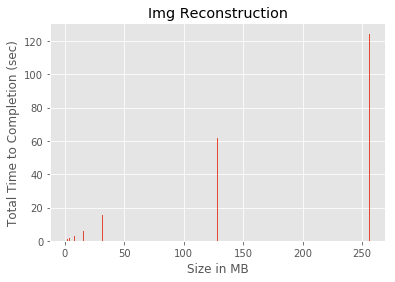

In [48]:
plt.bar(img_size,ttc)
plt.title('Img Reconstruction')
plt.xlabel('Size in MB')
plt.ylabel('Total Time to Completion (sec)')
#plt.xticks([1,2,3,8,16,32,64,128,256])

## Strong Scaling of Img Reconstruction

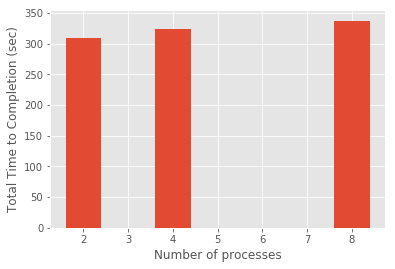

In [51]:
x = [2,4,8]
y = [309,324,337.480]
plt.bar(x,y)
plt.xlabel('Number of processes')
plt.ylabel('Total Time to Completion (sec)')